# Ownerships in Bogota, Colombia

The main goal of this inmersion is to generate a model which predicts the cost of an ownership in the different neighborhoods in Bogota, using the dataset called "inmuebles_bogota.csv" and the survey "Encuesta Multipropósito Bogotá-Cundinamarca-EM-2021".

## Importing and describing our data

### Importing libraries that will be used

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\inmuebles_bogota.csv")
data.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


## We will try to answere the next questions:

Q1.- Is there any outlayer in the columns "Rooms", "Bathrooms", "Area"?

Q2.- How many categories are in the "Type" column and how many ownerships are in each one?

Q3.- How many ownerships by neighborhood are in our dataset?

Q4.- What is the mean cost/m2 for each neighborhood? 

Q5.- Which are the top 10 neighborhoods with the highest variation in cost?

Q6.- Which are the top 10 neighborhoods with the highest mean cost?

Q7.- Which are the top 10 neighborhoods with the cheapest mean cost?

### 1.- Knowing and cleaning data

In this section I will remove any possible errors I might get because of 

- strange characters

- wrong type of values

- Values that does not make sense

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


- It is clear that the characters "ñ" and "Á" might be problematique, so I will take them off.

In [154]:
data=data.rename(columns={"Área":"Area",
                          "Baños":"Bathrooms",
                          "Descripcion":"Description",
                          "Habitaciones":"Rooms",
                          "Barrio":"Neighborhood",
                          "Valor":"Cost",
                          "Tipo":"Type"})

data.Type=data.Type.str.replace("Casa", "House")
data.Type=data.Type.str.replace("Apartamento", "Department")
data.Type=data.Type.str.replace("Lote", "Lot")
data.Type=data.Type.str.replace("Finca", "Land property")
data.Type=data.Type.str.replace("Oficina/Consultorio", "Office")
data.Type=data.Type.str.replace("Bodega", "Cellar")
data.Type=data.Type.str.replace("Edificio", "Building")


- I will change the data type of "Cost" column, from object (string) to float and I will change the unit to millions

In [155]:
data["cost_millions"] = data.Cost.str.split(regex=True, expand = True )[1] # regex = read regular expresions and expand returns a DataFrame
# I take the second column of the dataframe generated by expand = True because there we have the cost, that column it still a string type
data.cost_millions = data.cost_millions.str.replace(".","")
data.cost_millions = data.cost_millions.astype("float64")/1e6 #after clean our cost number, we change the type of the column to float and convert it
#to millions

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_18396\3329334211.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.cost_millions = data.cost_millions.str.replace(".","")


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           9520 non-null   object 
 1   Description    9520 non-null   object 
 2   Rooms          9520 non-null   int64  
 3   Bathrooms      9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Neighborhood   9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Cost           9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


Now data types are right, I will check for unusual values depending of the columns

In [157]:
data.describe()

,Rooms,Bathrooms,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


I just need two decimals, so I will change the display of the numbers

In [158]:
pd.set_option("display.precision",2) #round all math operations to just 2 decimals
pd.set_option("display.float_format",lambda x: "%.2f" %x) # show the values with two decimals
data.describe()

,Rooms,Bathrooms,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


For example, I can see the max rooms number and check for the info, just in case it might be a data that do not correspond with the Area value

In [159]:
data[data.Rooms == data.Rooms.max()]

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions
897,House,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,480.00


Also we can looking for the colums with the min area

In [160]:
data.query("Area == @data.Area.min()")

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions
8401,Department,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,180.00


As we can see, the number of rooms might be wrong because it has the same value as Area, and is a home, so it is impossible to have 110 rooms in a house with 110 m2 area, also, there's no reason to have 3 rooms in an 2 m2 area.
To see clearly all the outlayers I will create a boxplot of both parameters.

## Boxplot: Rooms by type of onwership

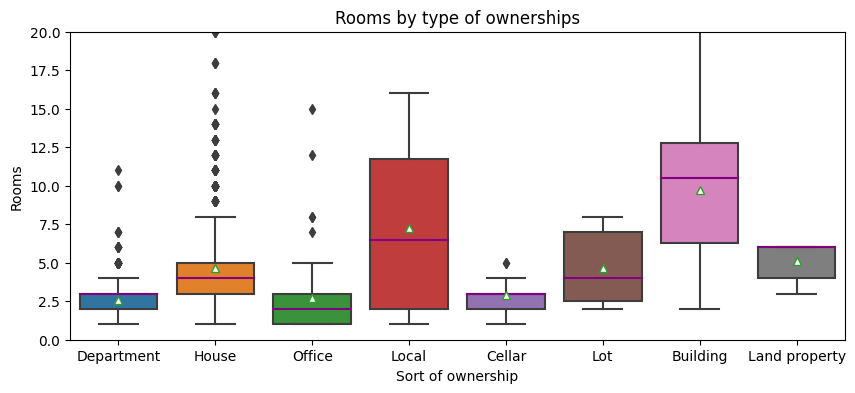

In [161]:
plt.figure(figsize=(10,4))
gp=sns.boxplot(
                data=data,
                x="Type",
                y="Rooms",
                showmeans=True,
                medianprops={
                    "color" : "purple",
                },
                meanprops={
                    "markerfacecolor" : "white",
                }
               
               ) #create a boxplot of rooms divided by sort of ownership 
gp.set_title("Rooms by type of ownerships")
gp.set_xlabel("Sort of ownership")
gp.set_ylim(0,20)
gp.set_ylabel("Rooms")
plt.show()

## Boxplot: Areas by type of onwership

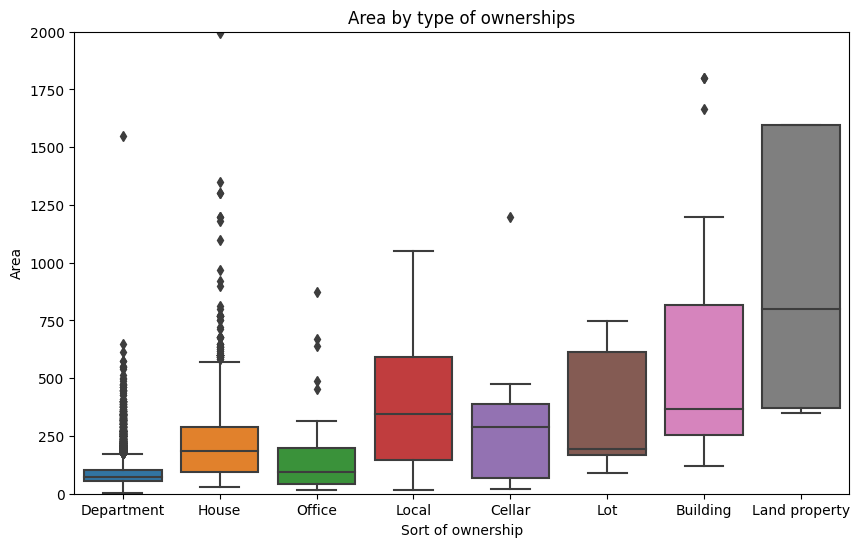

In [162]:
plt.figure(figsize=(10,6))
gp=sns.boxplot(data=data, x="Type",y="Area") #create a boxplot of rooms divided by sort of ownership 
gp.set_title("Area by type of ownerships")
gp.set_xlabel("Sort of ownership")
gp.set_ylabel("Area")
gp.set_ylim(0,2000)
plt.show()

## Boxplot: Cost of the top 3 neighborhoods with most onwerships at sale

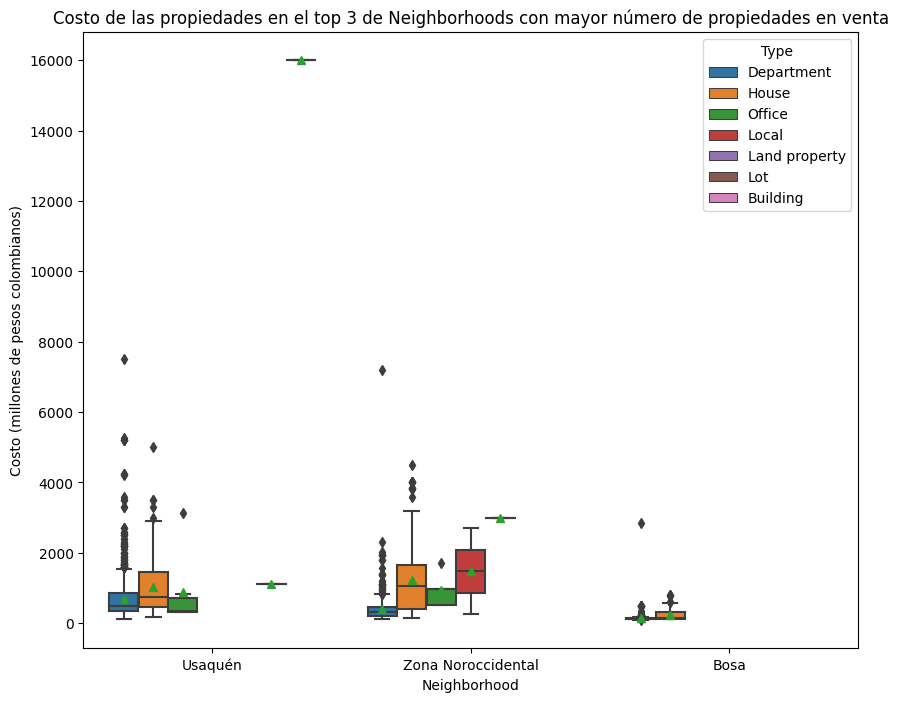

In [163]:
top_Neighborhoods=data.Neighborhood.value_counts()[:3].index.tolist() #list of top 10 neighborhoods with most ownerships at sale
df_top_Neighborhoods=data.query("Neighborhood in @top_Neighborhoods")# get a df with all data of the top Neighborhoods
plt.figure(figsize=((10,8)))
gp=sns.boxplot(data=df_top_Neighborhoods, x="Neighborhood", y="cost_millions",order=top_Neighborhoods, hue="Type", showmeans=True) 
#sort by top Neighborhoods and sort of property
#plt.xticks(rotation=45)
gp.set_xlabel("Neighborhood")
gp.set_ylabel("Costo (millones de pesos colombianos)")
gp.set_title("Costo de las propiedades en el top 3 de Neighborhoods con mayor número de propiedades en venta")
plt.show()

Lines drawn alone represents my boxplot. It is because cuartile 1 and 3, or percentil 25 and 75 has the same number, so the box became a line, it's hard to have many ownerships with the same cost, so it might be just one data in each type where I got a line. I will remove those types of ownership

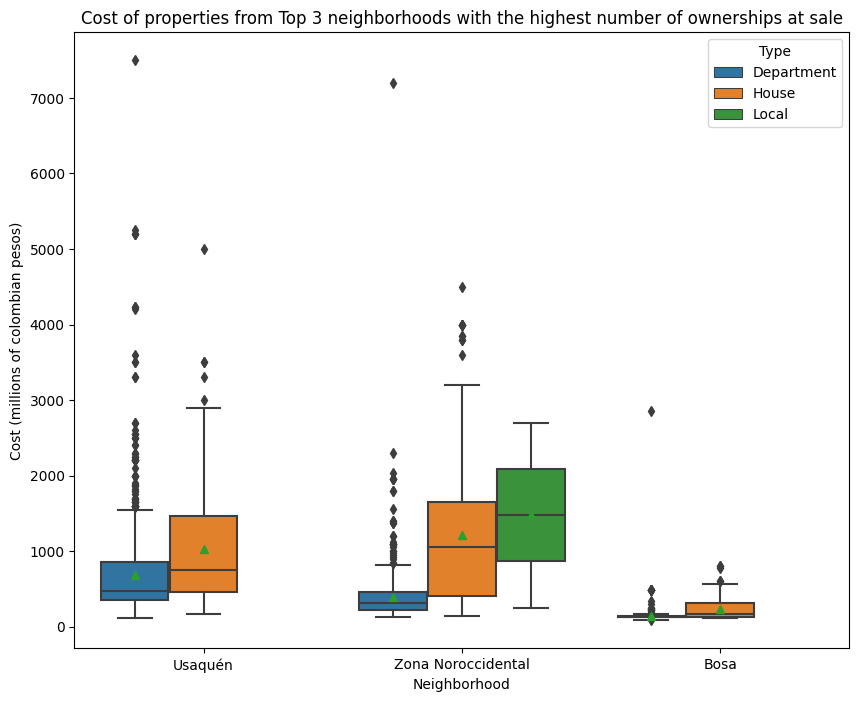

In [164]:
top_Neighborhoods=data.Neighborhood.value_counts()[:3].index.tolist() #list of top 3 neighborhoods with most ownerships at sale
ownshp_types=["Department","House","Local"]
df_top_Neighborhoods=data.query("(Neighborhood in @top_Neighborhoods) & (Type in @ownshp_types)")# get a df with all data of the top Neighborhoods
plt.figure(figsize=((10,8)))
gp=sns.boxplot(data=df_top_Neighborhoods, x="Neighborhood", y="cost_millions",order=top_Neighborhoods, hue="Type", showmeans=True) 
#sort by top Neighborhoods and sort of property
gp.set_xlabel("Neighborhood")
gp.set_ylabel("Cost (millions of colombian pesos)")
gp.set_title("Cost of properties from Top 3 neighborhoods with the highest number of ownerships at sale")
plt.show()


## Top 10 average cost/area by neighborhood 

In [165]:
df_nbhds=data.groupby("Neighborhood").sum(numeric_only=True) #numeric_only will 
# need to be changed to True in future versions
df_nbhds["cost_m2_millions"]=df_nbhds.cost_millions/df_nbhds.Area #
df_nbhds.reset_index(drop=False,inplace=True)
df_nbhds.sort_values("cost_m2_millions",ascending=False,inplace=True)
df_nbhds

,Neighborhood,Rooms,Bathrooms,Area,cost_millions,cost_m2_millions
124,Santa Ana,29,35,2475,25380.00,10.25
49,El Virrey,12,16,563,5590.00,9.93
65,La Candelaria,95,83,5559,49415.30,8.89
70,La Merced,2,3,82,719.00,8.77
40,El Castillo,12,14,537,4550.00,8.47
...,...,...,...,...,...,...
80,Las Ferias,22,12,640,1100.00,1.72
83,Libertador,18,16,2568,4080.00,1.59
116,Roma,8,3,260,350.00,1.35
11,Bosa Piamonte,12,8,800,940.00,1.18


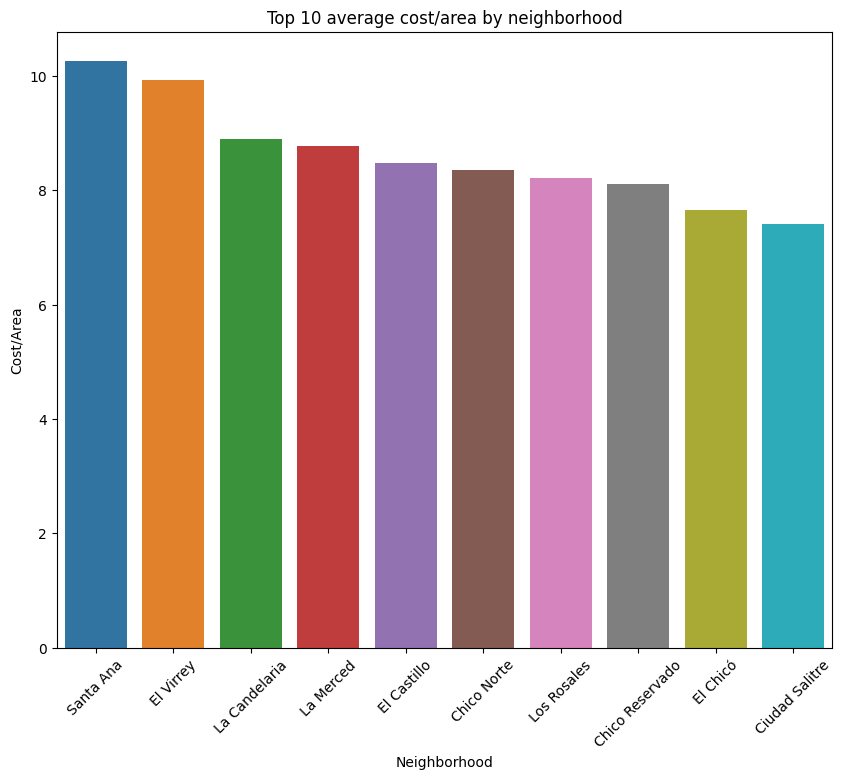

In [166]:
plt.figure(figsize=((10,8)))
gp=sns.barplot(data=df_nbhds, x=df_nbhds.Neighborhood.head(10), y="cost_m2_millions")
plt.xticks(rotation=45)
gp.set_title("Top 10 average cost/area by neighborhood")
gp.set_ylabel("Cost/Area")
plt.show()

What if I need the mean cost/m2 by neighborhood and by type of ownership?

I need to add the "cost_m2_millions" column of the new dataframe generated to my old dataset. So I will map the values "neighborhood" and set the cost/m2. To do that, i will create a dictionary that will storage as key the names of all neighborhoods and as values the cost/m2

In [172]:
df_nbhds=data.groupby(["Neighborhood","Type"]).sum(numeric_only=True) #Because i already did a sum() it generates a DataFrame
df_nbhds["cost_m2_millions_own"] = df_nbhds.cost_millions/df_nbhds.Area
df_nbhds.head()

#df_nbhds

Rooms  Bathrooms  Area  cost_millions  \
Neighborhood Type                                                
Alameda      Department      3          2    97         580.00   
Alhambra     Department     22         21   984        4625.00   
             House          29         29  2253        8165.00   
Andes Norte  Department     13         14   514        3467.00   
             House           8          6   360        1500.00   

                         cost_m2_millions_own  
Neighborhood Type                              
Alameda      Department                  5.98  
Alhambra     Department                  4.70  
             House                       3.62  
Andes Norte  Department                  6.75  
             House                       4.17

In [177]:
df_nbhds.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 303 entries, ('Alameda', 'Department') to ('Zona Noroccidental', 'Office')
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rooms                 303 non-null    int64  
 1   Bathrooms             303 non-null    int64  
 2   Area                  303 non-null    int64  
 3   cost_millions         303 non-null    float64
 4   cost_m2_millions_own  303 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 26.5+ KB


In [173]:
dict_groups=dict(df_nbhds.cost_m2_millions_own)
keys=list(dict_groups.keys())
keys[:3]


[('Alameda', 'Department'), ('Alhambra', 'Department'), ('Alhambra', 'House')]

In [179]:
dict_groups.values()

dict_values([5.979381443298969, 4.70020325203252, 3.624056813138038, 6.745136186770428, 4.166666666666667, 3.7874769230769227, 2.5617542728152207, 4.4748338081671415, 2.766798418972332, 3.821808631747148, 3.898335546180122, 0.4522628469212246, 5.842829076620825, 2.7882037533512065, 6.395348837209302, 6.343670802516835, 6.031152647975078, 6.25, 2.522711390635919, 2.857142857142857, 5.384615384615385, 5.626949740034662, 4.54798331015299, 2.9043498445223985, 2.1204385790831513, 1.175, 3.1666666666666665, 6.046475195822455, 3.864097363083164, 5.50655737704918, 2.273105745212323, 2.6, 4.0625, 5.888534346312125, 4.436450839328537, 5.5393794749403344, 3.9269406392694064, 3.1, 6.95067264573991, 4.26628895184136, 3.0431952662721895, 5.168311289743762, 4.327282668124658, 8.513513513513514, 6.202830188679245, 4.305921611146682, 5.725256421495573, 10.318275154004107, 5.918367346938775, 7.2948994252873565, 4.735376044568246, 6.360286919831224, 4.992869875222817, 7.425742574257426, 8.4230673377755, 

As we can see, keys in our dictionary are tuples, so I need to write each one in the "data" dataframe. So then I can match the values required.

In [180]:
data["cost_m2_millions_type"]=[0]*len(data)
for value in data.index:
        data.cost_m2_millions_type[value] = (data.Neighborhood[value],data.Type[value])

data.head()
    

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_18396\1360522773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cost_m2_millions_type[value] = (data.Neighborhood[value],data.Type[value])


,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions,cost_m2_millions_type
0,Department,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,"(Zona Noroccidental, Department)"
1,House,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,"(Castilla, House)"
2,Department,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,"(Chico Reservado, Department)"
3,Department,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.00,"(Usaquén, Department)"
4,Department,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.00,"(Bella Suiza, Department)"


In [181]:
data.cost_m2_millions_type=data.cost_m2_millions_type.map(dict_groups)
data.head()

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions,cost_m2_millions_type
0,Department,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,4.41
1,House,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,3.04
2,Department,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,8.30
3,Department,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.00,6.18
4,Department,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.00,6.34


As we can see, I just created a new column where our cost_m2 will be stored, but with the neighborhood values, our keys in our dictionary. 
With the function .map() i can change those keys with our values

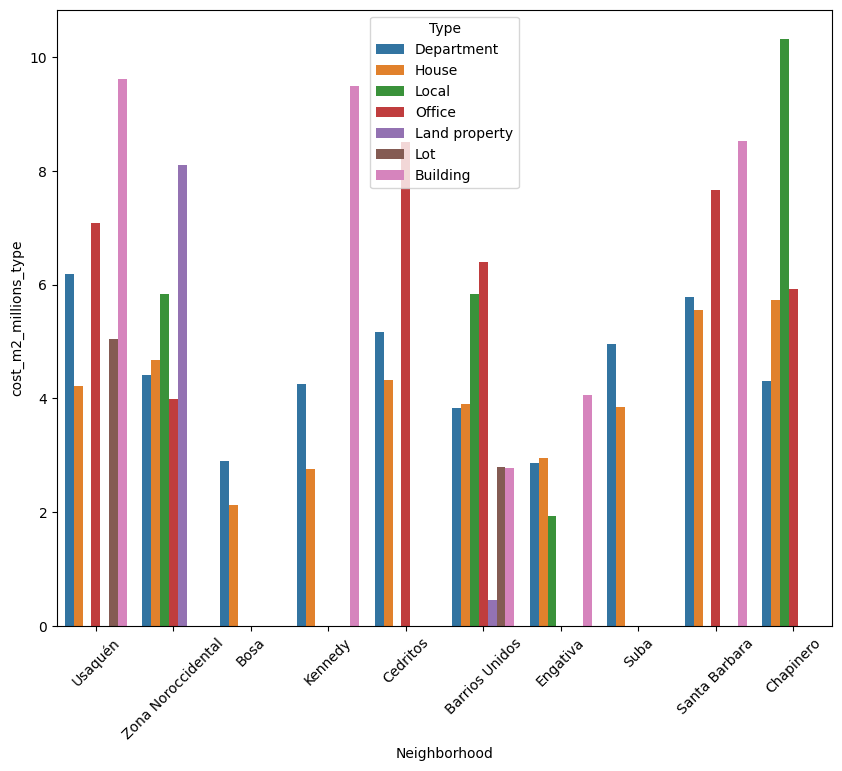

In [191]:
top10=data.Neighborhood.value_counts(ascending=False).index[:10]
top10_df=data.query("Neighborhood in @top10")
top10_df.head()
plt.figure(figsize=((10,8)))
sns.barplot(data=top10_df, y="cost_m2_millions_type", hue="Type", x="Neighborhood", order=top10)
plt.xticks(rotation=45)
plt.show()

And now I just select the top 10 neighborhoods with the highest number of ownerships at sale in our dataset

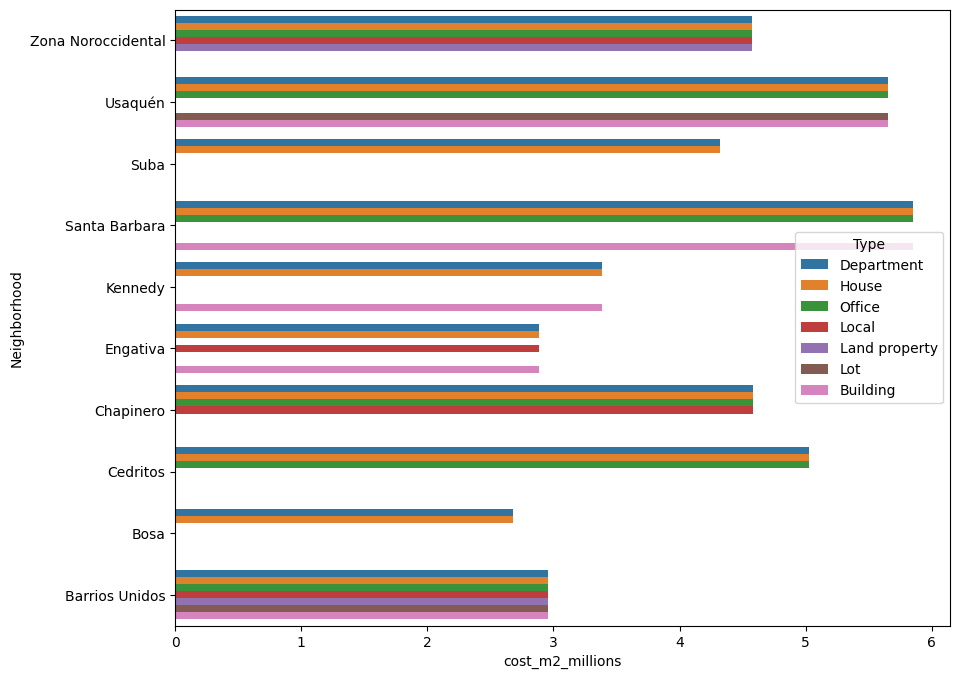

In [ ]:
top10=data.Neighborhood.value_counts()[:10].index.tolist()
top10_df=data.query("Neighborhood in @top10")
plt.figure(figsize=(10,8))
sns.barplot(data=top10_df, y = "Neighborhood", x = "cost_m2_millions", hue="Type")
plt.show()
